# Get dataset to our workspace

the dataset is available on Kaggle :
https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification

but i uploaded it to My G-Drive, so i will get it from.

In [ ]:
!cp ./drive/MyDrive/EyeDiseaseRetinalImages.zip ./

Now after i get "EyeDiseaseRetinalImages.zip" file to my workspace i will extract it.

In [ ]:
!unzip ./EyeDiseaseRetinalImages.zip -d ./

Archive:  ./EyeDiseaseRetinalImages.zip
  inflating: ./dataset/cataract/0_left.jpg  
  inflating: ./dataset/cataract/103_left.jpg  
  inflating: ./dataset/cataract/1062_right.jpg  
  inflating: ./dataset/cataract/1083_left.jpg  
  inflating: ./dataset/cataract/1084_right.jpg  
  inflating: ./dataset/cataract/1102_left.jpg  
  inflating: ./dataset/cataract/1102_right.jpg  
  inflating: ./dataset/cataract/1115_left.jpg  
  inflating: ./dataset/cataract/1126_right.jpg  
  inflating: ./dataset/cataract/112_right.jpg  
  inflating: ./dataset/cataract/1144_left.jpg  
  inflating: ./dataset/cataract/1144_right.jpg  
  inflating: ./dataset/cataract/1164_left.jpg  
  inflating: ./dataset/cataract/1167_right.jpg  
  inflating: ./dataset/cataract/119_left.jpg  
  inflating: ./dataset/cataract/1285_left.jpg  
  inflating: ./dataset/cataract/1415_left.jpg  
  inflating: ./dataset/cataract/1415_right.jpg  
  inflating: ./dataset/cataract/1435_left.jpg  
  inflating: ./dataset/cataract/1444_left.jpg 

# Start Coding

## Install required libraries

In [ ]:
!pip install fastai
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from fastai.vision.all import *

## Define Dataset Path

In [ ]:
path = Path('/content/dataset/')

## Set the Data Block to get data from Dataset as Images and get labels from parent folder names

In [ ]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)]
)

## Define the Dataloaders

In [ ]:
dls = data_block.dataloaders(path, bs=64)

## Show batch from data

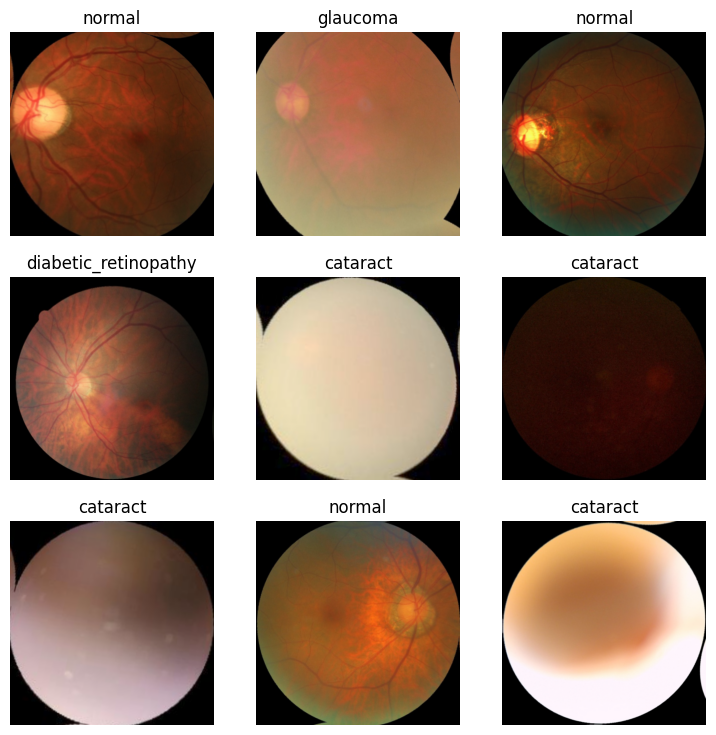

In [ ]:
dls.show_batch()

## Define learner as a VisionLearner (becasue our dataset is images) and select "Resnet34" as model to fine tune on it.

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 150MB/s]


## Training for 5 epochs

In [ ]:
learn.fit_one_cycle(8, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.226273,0.363163,0.875445,01:19
1,0.267626,0.352055,0.886121,01:15
2,0.269879,0.370396,0.870700,01:15
3,0.252363,0.318032,0.883749,01:14
4,0.216829,0.258222,0.900356,01:16
5,0.182755,0.283592,0.901542,01:16
6,0.150466,0.295142,0.901542,01:19
7,0.137230,0.285024,0.903915,01:20


## Export trained model

In [ ]:
learn.export('RetinalClassification.pkl')

## Copy the modle 'RetinalClassification.pkl' to My G-Drive

In [ ]:
!cp ./RetinalClassification.pkl ./drive/MyDrive/

# Test model

In [1]:
!pip install fastai
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
from fastai.vision.all import *

get the model from Drive

In [4]:
!cp ./drive/MyDrive/RetinalClassification.pkl ./

load the model

In [5]:
learn = load_learner("RetinalClassification.pkl")

select an image

In [13]:
import requests
from PIL import Image

image_url = 'https://www.eyecenters.com/wp-content/uploads/2016/10/bdr.jpg'
response = requests.get(image_url)

with open('temp.png', 'wb') as f:
    f.write(response.content)




img = PILImage.create('./temp.png')


In [14]:
pred_class, pred_idx, outputs = learn.predict(img)

print(f"Predicted class: {pred_class}")
print(f"Predicted index: {pred_idx}")
print(f"Output probabilities: {outputs}")

Predicted class: diabetic_retinopathy
Predicted index: 1
Output probabilities: tensor([4.8382e-05, 9.9835e-01, 9.5371e-04, 6.4544e-04])


# Upload Model To Hugging Face Spcae
https://huggingface.co/spaces/MohammedAlakhras/Retinal_Diseases_Classification/

In [ ]:
!python -m pip install huggingface_hub
!huggingface-cli login

In [16]:
!git clone https://huggingface.co/spaces/MohammedAlakhras/Retinal_Diseases_Classification/

Cloning into 'Retinal_Diseases_Classification'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (10/10), 3.73 KiB | 1.24 MiB/s, done.


In [21]:
!cd Retinal_Diseases_Classification && git lfs install

Updated git hooks.
Git LFS initialized.


In [22]:
!cd Retinal_Diseases_Classification && huggingface-cli lfs-enable-largefiles .

Local repo set up for largefiles


In [23]:
!cp ./RetinalClassification.pkl ./Retinal_Diseases_Classification/

In [24]:
!cd Retinal_Diseases_Classification && git add *

In [32]:
!cd Retinal_Diseases_Classification && git remote set-url origin https://MohammedAlakhras:<TOKEN>@huggingface.co/spaces/MohammedAlakhras/Retinal_Diseases_Classification

In [28]:
!cd Retinal_Diseases_Classification && git config --global user.email "MAbdMAK@gmail.com"
!cd Retinal_Diseases_Classification && git config --global user.name "MohammedAlakhras"
!cd Retinal_Diseases_Classification && git commit -m "Upload Model"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [33]:
!cd Retinal_Diseases_Classification && git push

Uploading LFS objects: 100% (1/1), 96 MB | 16 MB/s, done.
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 401 bytes | 401.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
To https://huggingface.co/spaces/MohammedAlakhras/Retinal_Diseases_Classification
   ce417d0..61011a2  main -> main
